In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "7QR7t13SCnk9NqsZfsxA7TLWG"
Consumer_Secret_Key = "UG5fMtsvhfed60Ph8x3XioOMI6GZoc1PVp1xOrOvyU4P7ZkoUI"
Access_Token = "1169119459400978435-AFfZGZbq2pPUS0kfDwOOM8tFd2amR3"
Access_Token_Secret = "kx12HUgzobDE89Iqd1gNG1r2cpfBW5oReWR1rgFFqXC3I"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [47]:
posts = api.user_timeline(screen_name="bighit entertainment", count = 100,  lang = "in", tweet_mode = "extended")

#print the last 1000 tweets
print ("Show the 1000 recent tweets:\n")
i=1000
for tweet in posts[:1000]:
  print(str(i) + ')'+ tweet.full_text + '\n')
  i=i+1

Show the 1000 recent tweets:

1000)RT @BTS_twt: Savage Love 🎶 #SavageLoveRemix https://t.co/IY0iKYP1eu

1001)RT @BigHitEnt: BTS (방탄소년단) MAP OF THE SOUL ON:E Teaser 2
(https://t.co/M6gXEyVsBP)

#BTS #방탄소년단 #MapOfTheSoulOne

1002)RT @BTS_twt: 인더숲 안녕 ㅜㅜ 😪 https://t.co/0P3zMMHQiz

1003)RT @BTS_twt: vcut😁 https://t.co/3TGOzA6Tbb

1004)@BTS_twt I love you my tetet💜

1005)Gatau lagi donh mo ngomong apa 💜 https://t.co/mnUlt7Cn7R

1006)@BTS_twt Nee kamsahamida oppa 😘

1007)RT @bts_bighit: 🎉Billboard #Hot100 No.1 AGAIN🎉
아미 여러분 덕분에 또 한번의 기적이 일어났습니다.

#BTS_Dynamite 에 꾸준한 사랑 보내주시는 전 세계 아미 여러분, 정말 감사합니다! 

Thank yo…

1008)Parah sih 💜 dan bangga banget pokokny💜💜 https://t.co/MLdjcPg4rK

1009)RT @BigHitEnt: [기사] #BTS Performs a Tiny Desk Concert -- and Breaks Viewership Record 25 Minutes After Debut
https://t.co/9R1HUeIhB6

1010)RT @tokopedia: Sudah siap lihat #ComebackTreasurediWIB TV Show? Kita kasih bocoran dikit nih🤫 Treasure akan jadi opening #TokopediaWIB TV S…

1011)Someday there will definitel

In [48]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 1000 rows of data
df.head()

,Tweets
0,RT @BTS_twt: Savage Love 🎶 #SavageLoveRemix ht...
1,RT @BigHitEnt: BTS (방탄소년단) MAP OF THE SOUL ON:...
2,RT @BTS_twt: 인더숲 안녕 ㅜㅜ 😪 https://t.co/0P3zMMHQiz
3,RT @BTS_twt: vcut😁 https://t.co/3TGOzA6Tbb
4,@BTS_twt I love you my tetet💜


In [49]:
def cleanTxt(text):
  text = re.sub('@[A-Za - z0-9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) #Removing '#' has tag
  text = re.sub('RT[\s]+', '', text) #Removing RT
  text = re.sub('https?:\/\/\s+', '', text) #Removing hyperlink
  
  return text

  #clean the tweets
  df['Tweets'] = df['Tweets'].apply(cleanTxt)

  #show the cleaned tweets
  df 

In [50]:
#creat a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creat a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creat two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,RT @BTS_twt: Savage Love 🎶 #SavageLoveRemix ht...,0.600000,0.500000
1,RT @BigHitEnt: BTS (방탄소년단) MAP OF THE SOUL ON:...,0.000000,0.000000
2,RT @BTS_twt: 인더숲 안녕 ㅜㅜ 😪 https://t.co/0P3zMMHQiz,0.000000,0.000000
3,RT @BTS_twt: vcut😁 https://t.co/3TGOzA6Tbb,0.000000,0.000000
4,@BTS_twt I love you my tetet💜,0.600000,0.500000
5,Gatau lagi donh mo ngomong apa 💜 https://t.co/...,0.000000,0.000000
6,@BTS_twt Nee kamsahamida oppa 😘,0.000000,0.000000
7,RT @bts_bighit: 🎉Billboard #Hot100 No.1 AGAIN🎉...,0.000000,0.000000
8,Parah sih 💜 dan bangga banget pokokny💜💜 https:...,0.000000,0.000000
9,RT @BigHitEnt: [기사] #BTS Performs a Tiny Desk ...,0.750000,-0.375000


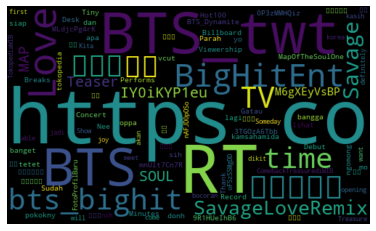

In [51]:
#word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [52]:
#create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):


  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df ['Analysis'] = df['Polarity'].apply(getAnalysis)
#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,RT @BTS_twt: Savage Love 🎶 #SavageLoveRemix ht...,0.600000,0.500000,Positive
1,RT @BigHitEnt: BTS (방탄소년단) MAP OF THE SOUL ON:...,0.000000,0.000000,Neutral
2,RT @BTS_twt: 인더숲 안녕 ㅜㅜ 😪 https://t.co/0P3zMMHQiz,0.000000,0.000000,Neutral
3,RT @BTS_twt: vcut😁 https://t.co/3TGOzA6Tbb,0.000000,0.000000,Neutral
4,@BTS_twt I love you my tetet💜,0.600000,0.500000,Positive
5,Gatau lagi donh mo ngomong apa 💜 https://t.co/...,0.000000,0.000000,Neutral
6,@BTS_twt Nee kamsahamida oppa 😘,0.000000,0.000000,Neutral
7,RT @bts_bighit: 🎉Billboard #Hot100 No.1 AGAIN🎉...,0.000000,0.000000,Neutral
8,Parah sih 💜 dan bangga banget pokokny💜💜 https:...,0.000000,0.000000,Neutral
9,RT @BigHitEnt: [기사] #BTS Performs a Tiny Desk ...,0.750000,-0.375000,Negative


In [53]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if ( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)RT @BigHitEnt: [기사] #BTS Performs a Tiny Desk Concert -- and Breaks Viewership Record 25 Minutes After Debut
https://t.co/9R1HUeIhB6



In [54]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if ( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

1)RT @BTS_twt: Savage Love 🎶 #SavageLoveRemix https://t.co/IY0iKYP1eu

2)@BTS_twt I love you my tetet💜

3)Someday there will definitely be time for you to be able to do what you want with joy 💜 https://t.co/oFSzSSMgDD

4)@bts_bighit If i come to korea first time i do is meet you bts ❤❤



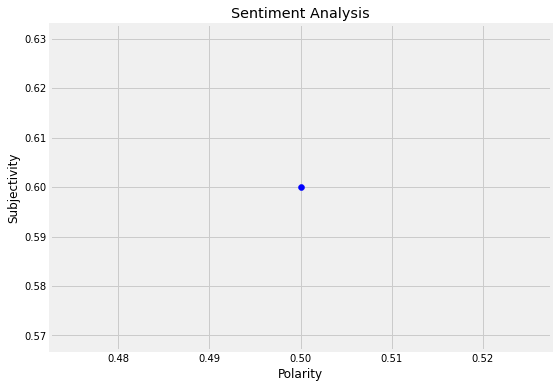

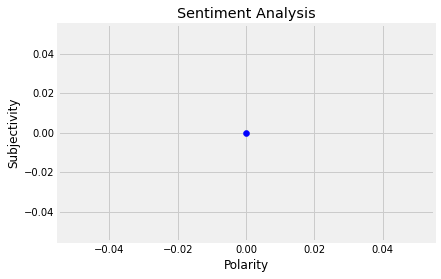

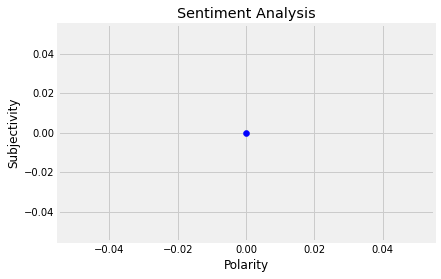

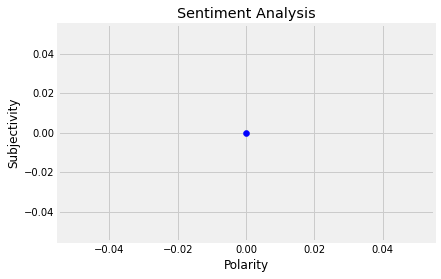

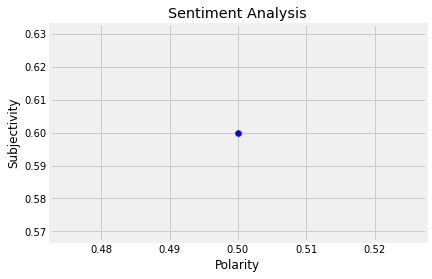

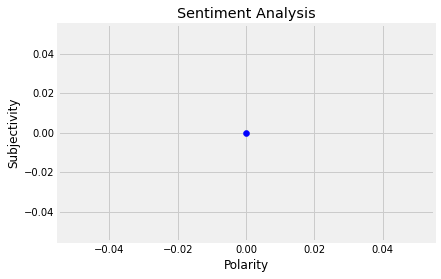

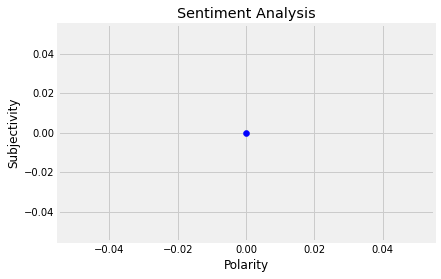

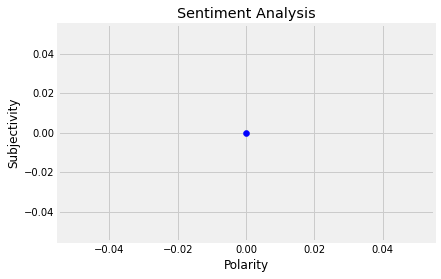

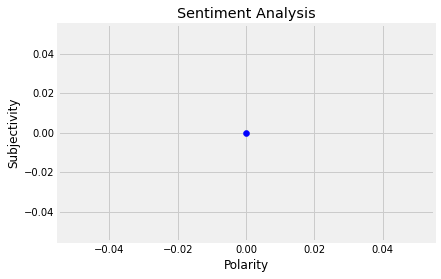

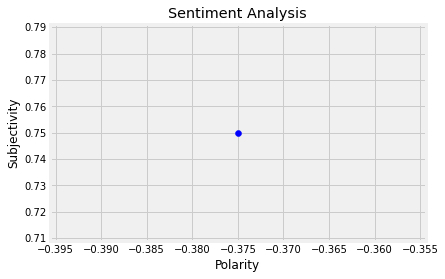

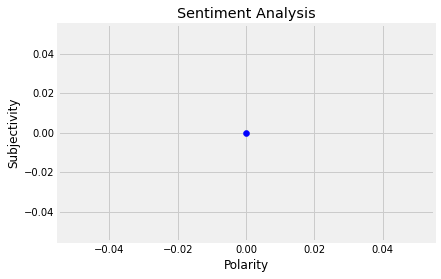

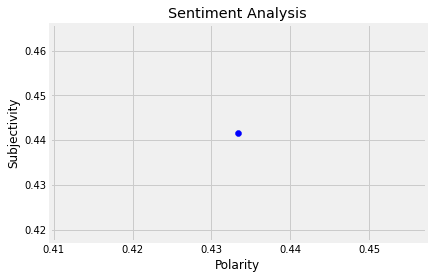

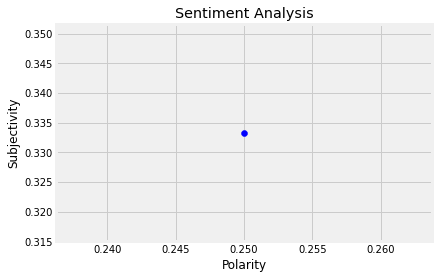

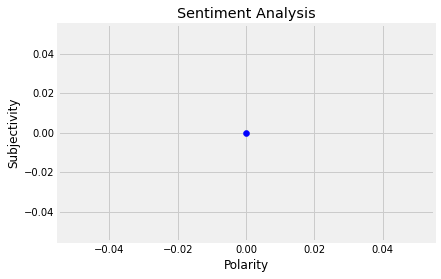

In [55]:
plt.figure(figsize=(8,6))
for i in range(0, sortedDF.shape[0] ):
  plt.scatter(df["Polarity"][i],df["Subjectivity"][i],color='Blue')
  #plt.scatter(x,y,color)
  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show()

In [61]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

28.6

In [62]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100 , 1)

7.1

In [58]:
#show the value counts
df['Analysis'].value_counts()

Neutral     9
Positive    4
Negative    1
Name: Analysis, dtype: int64

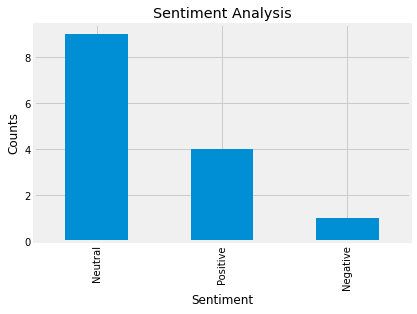

In [63]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

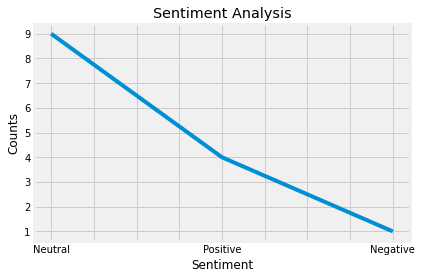

In [64]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()